# Project
## Region and Domain
Ann Arbor, Michigan, United States

Religious events or traditions

## Research Question
Write question here

## Links
RELIG-key dataset: https://query.data.world/s/atdw6qwmzpz7srt3gbqvfz4kshxalj

TotalPopulationWeightsByStateByReligion dataset: https://query.data.world/s/a6xxpjcpvwdp6c7fkh3ktqs6pn5vyn

## Data cleaning

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

relig = pd.read_csv('./data/RELIG-key.csv')

state = pd.read_csv('./data/TotalPopulationWeightsByStateByReligion.csv')

genData = pd.read_excel('./data/ARIS2008.xlsx')
genData.drop(genData.columns.difference(['RELIG','SEX']), axis=1, inplace=True)

relig_state = pd.merge(genData, (pd.merge(relig, data, how='inner', on='RELIG')), how = 'inner', on='RELIG')

#relig_state = relig_state.fillna("", inplace=False)


In [153]:
relig_state.head()

,SEX,RELIG,RELIGID,TOTAL,PERCENT,STATE,POPWGHT
0,1,98,Don't know,23,1.0,AL,0.172852
1,1,98,Don't know,23,1.0,AR,0.205963
2,1,98,Don't know,23,1.0,AZ,0.239815
3,1,98,Don't know,23,1.0,CA,2.216259
4,1,98,Don't know,23,1.0,CO,0.355630


In [125]:
michigan = relig_state[relig_state.STATE == 'MI']
print(michigan)

         SEX  RELIG         RELIGID  TOTAL  PERCENT STATE   POPWGHT
20         1     98      Don't know     23      1.0    MI  0.654444
69         2     98      Don't know     23      1.0    MI  0.654444
118        2     98      Don't know     23      1.0    MI  0.654444
167        2     98      Don't know     23      1.0    MI  0.654444
216        1     98      Don't know     23      1.0    MI  0.654444
...      ...    ...             ...    ...      ...   ...       ...
2585069    2     16  Other Lutheran      0      0.0    MI  0.085963
2585077    1     16  Other Lutheran      0      0.0    MI  0.085963
2585085    1     16  Other Lutheran      0      0.0    MI  0.085963
2585093    2     16  Other Lutheran      0      0.0    MI  0.085963
2585101    2     16  Other Lutheran      0      0.0    MI  0.085963

[54012 rows x 7 columns]


In [160]:
catholic = michigan[michigan['RELIG']==1]
catholic_man = len(catholic[catholic['SEX']==1])
catholic_women = len(catholic[catholic['SEX']==2])

dont_know = michigan[michigan['RELIG']==98]
dont_know_man = len(dont_know[dont_know['SEX']==1])
dont_know_women = len(dont_know[dont_know['SEX']==2])

atheist = michigan[michigan['RELIG']==90]
atheist_man =  len(atheist[atheist['SEX']==1])
atheist_women =  len(atheist[atheist['SEX']==2])


no_religion = michigan[michigan['RELIG']==95]
no_religion_man =  len(no_religion[no_religion['SEX']==1])
no_religion_women =  len(no_religion[no_religion['SEX']==2])

refused = michigan[michigan['RELIG']==99]
refused_man =  len(refused[refused['SEX']==1])
refused_women =  len(refused[refused['SEX']==2])


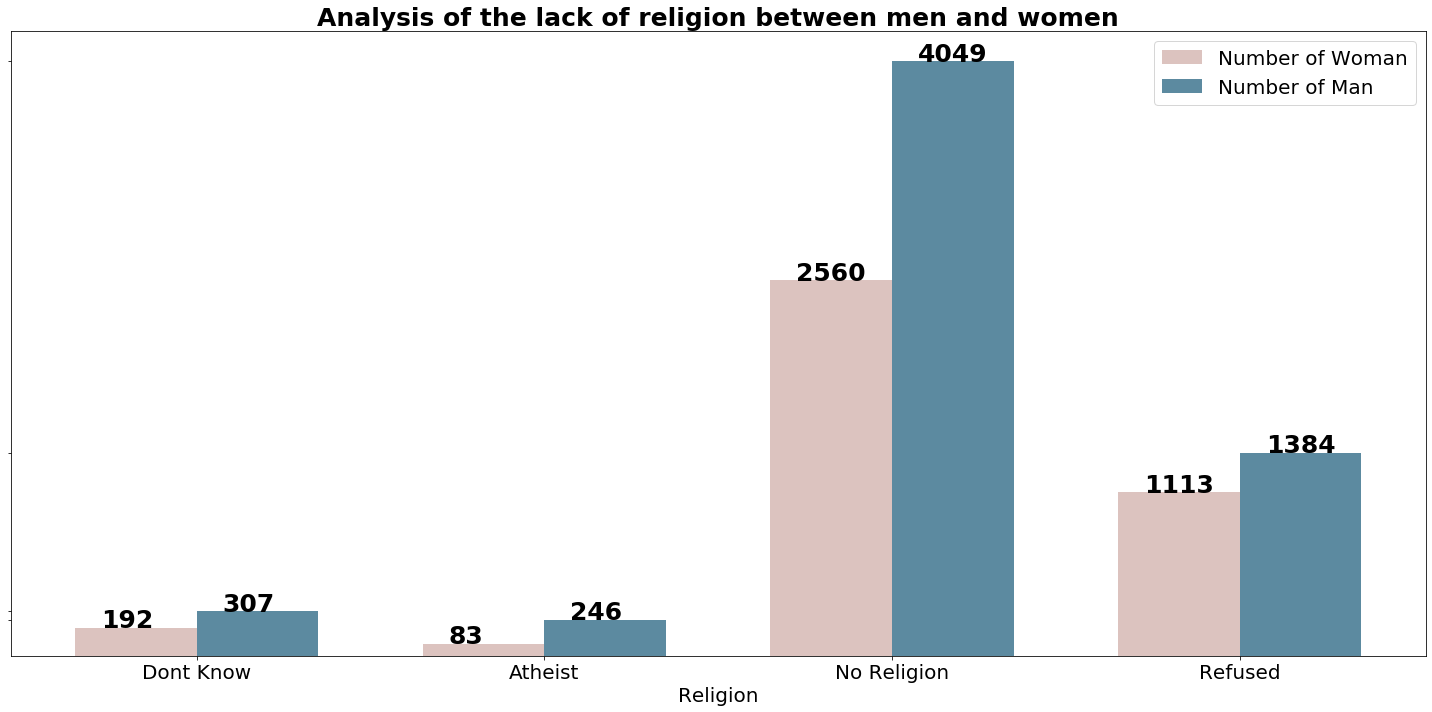

In [258]:
# create plot
fig, ax = plt.subplots(figsize=(20, 10))
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

women_data = [dont_know_women, atheist_women, no_religion_women, refused_women]


rects1 = plt.bar(index, women_data, bar_width,
alpha=opacity,
color='#d4b5b0',
label='Number of Woman')

man_data = [dont_know_man, atheist_man, no_religion_man, refused_man]

rects2 = plt.bar(index + bar_width, man_data, bar_width,
alpha=opacity,
color='#336d88',
label='Number of Man')

plt.xlabel('Religion', size=20)
plt.title('Analysis of the lack of religion between men and women', size=25, fontweight='bold')
plt.xticks(index + (bar_width/2), ('Dont Know', 'Atheist', 'No Religion', 'Refused'), size=20)
plt.yticks(man_data,"")
plt.legend(fontsize=20)

for a,b in zip(index,women_data):
    plt.text(a-0.1, b, str(b), fontsize=25, fontweight='bold')

for a,b in zip(index,man_data):
    plt.text(a+0.25, b, str(b), fontsize=25, fontweight='bold')

plt.tight_layout()
plt.show()